In [12]:
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


In [5]:
data = pd.read_csv('../output/amazon_echo_dot446.csv')

# getting the shape of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            4460 non-null   float64
 1   date              4460 non-null   object 
 2   shop              4460 non-null   object 
 3   title             4460 non-null   object 
 4   verified_reviews  4460 non-null   object 
dtypes: float64(1), object(4)
memory usage: 174.3+ KB


In [7]:
# describing the data set

data.describe()

,rating
count,4460.000000
mean,4.674664
std,0.684781
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
# checking if there is any null data or not

data.isnull().any().any()

False

In [9]:
# adding a length column for analyzing the length of the reviews

data['length'] = data['verified_reviews'].apply(len)

data.groupby('length').describe().sample(10)

rating                                             
        count      mean       std  min  25%  50%  75%  max
length                                                    
335       5.0  3.800000  1.643168  1.0  4.0  4.0  5.0  5.0
560       2.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0
409       6.0  4.333333  0.816497  3.0  4.0  4.5  5.0  5.0
628       1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0
633       1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0
155       6.0  4.833333  0.408248  4.0  5.0  5.0  5.0  5.0
661       1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0
410       5.0  4.000000  1.224745  2.0  4.0  4.0  5.0  5.0
620       1.0  4.000000       NaN  4.0  4.0  4.0  4.0  4.0
1497      2.0  3.000000  1.414214  2.0  2.5  3.0  3.5  4.0

In [10]:
data.groupby('rating').describe()

length                                                              
         count        mean         std    min     25%    50%     75%     max
rating                                                                      
1.0       41.0  455.048780  374.536978  136.0  217.00  295.0  555.00  1869.0
2.0       50.0  397.080000  243.416569  165.0  271.00  346.0  428.25  1497.0
3.0      160.0  398.700000  277.482546  152.0  233.50  307.5  443.00  1923.0
4.0      817.0  343.965728  206.301634   82.0  222.00  287.0  401.00  2229.0
5.0     3392.0  303.049233  163.980279   82.0  207.75  262.0  350.00  2302.0

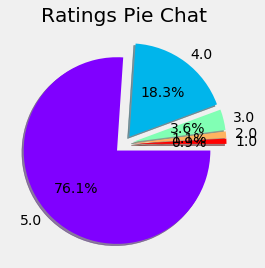

In [21]:
import matplotlib.cm as cm
import matplotlib.cm as cm

#count data rating
counts = data.rating.value_counts()
#rating pie
values = counts.values
labels = counts.index
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False,
        shadow=True)
plt.title('Ratings Pie Chat')
plt.show()

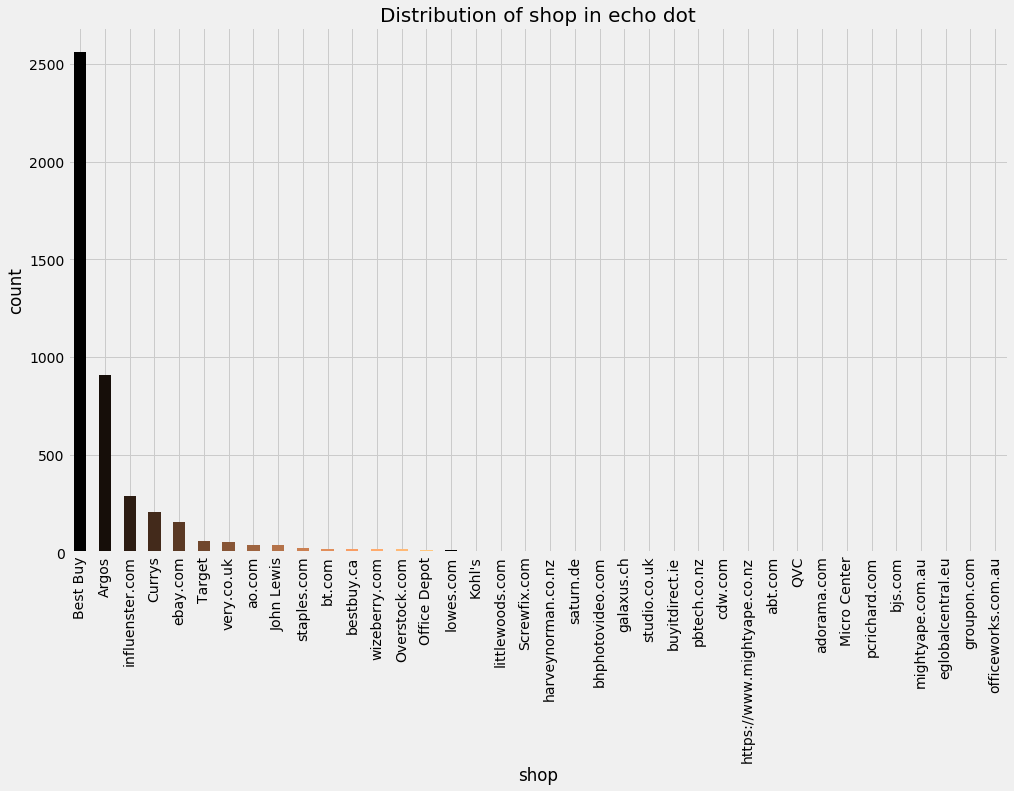

In [22]:
color = plt.cm.copper(np.linspace(0, 1, 15))
data['shop'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of shop in echo dot', fontsize = 20)
plt.xlabel('shop')
plt.ylabel('count')
plt.show()